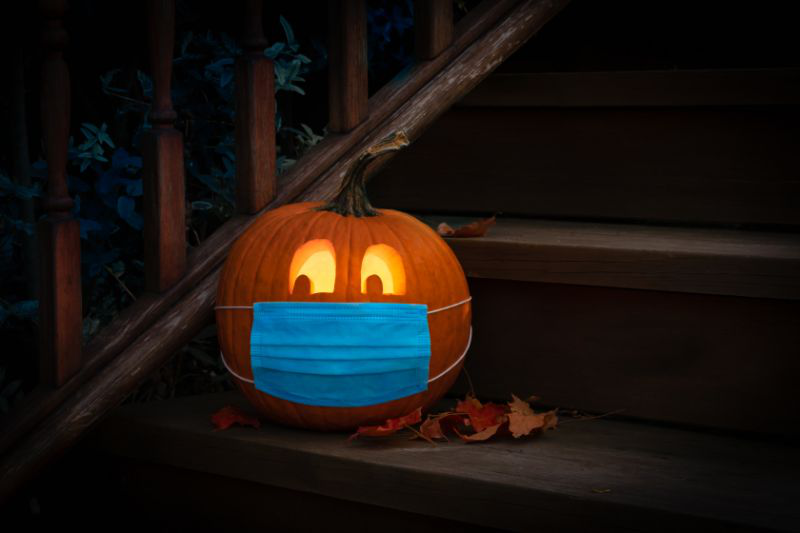

In [2]:
from PIL import Image
import sys

try:
    citrouille = Image.open("citrouille.jpg")

except IOError:
    print("Erreur")
    sys.exit(1)
    
display(citrouille)

In [59]:
print("Format: {0}\nSize: {1}\nMode: {2}".format(citrouille.format, 
    citrouille.size, citrouille.mode))

Format: JPEG
Size: (800, 533)
Mode: RGB


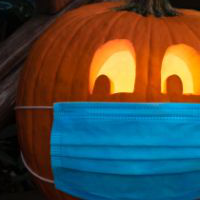

In [3]:
recadrer = citrouille.crop((200, 200, 400, 400))
recadrer.save('citrouille_recadrer.jpg')

display(recadrer)

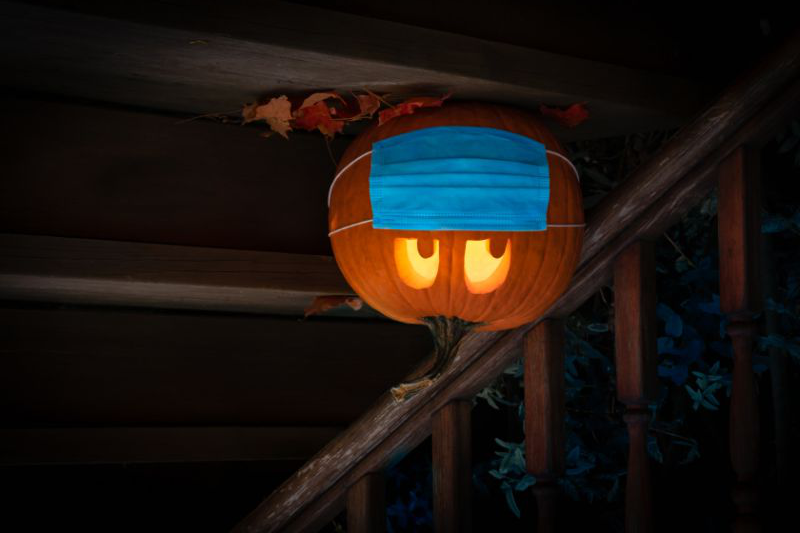

In [4]:
rotation = citrouille.rotate(180)
rotation.save('citrouille_rotation.jpg')

display(rotation)

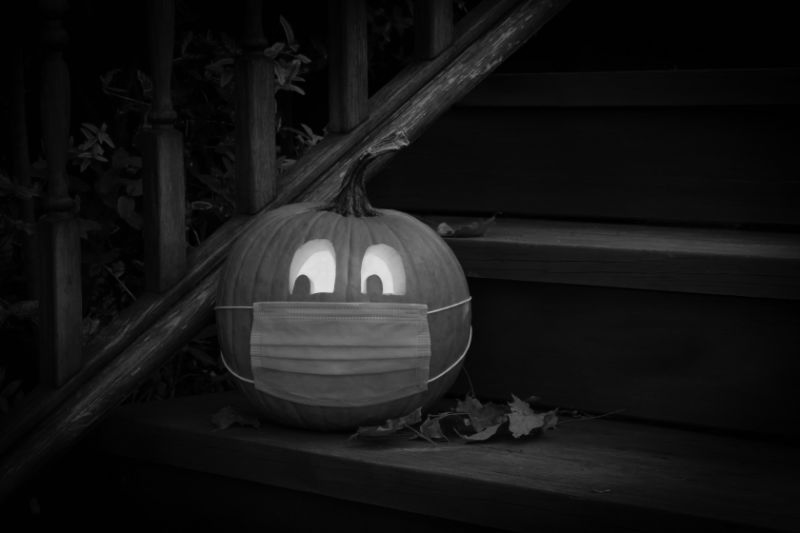

In [6]:
cici = citrouille.convert('LA')
cici.save('gris.png')

display(cici)

In [10]:
citrouille.save('citrouille.png', 'png')